In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = r"C:\Users\Admin\DataMining\data"
df = pd.read_csv(data_path)

# Aperçu des données

In [3]:
print("Dimensions du dataset :", df.shape)
print("\nAperçu des 5 premières lignes :")
df.head()

Dimensions du dataset : (203769, 168)

Aperçu des 5 premières lignes :


,txId,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,class
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,unknown


## Informations sur les colonnes et types

In [4]:
print("\nInfos sur les colonnes :")
df.info()


Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Columns: 168 entries, txId to class
dtypes: float64(165), int64(2), object(1)
memory usage: 261.2+ MB


## Vérifier les valeurs uniques par colonne

In [5]:
print("\nValeurs uniques par colonne (5 premières colonnes) :")
print(df.nunique().head())



Valeurs uniques par colonne (5 premières colonnes) :
txId         203769
feature_1        49
feature_2    195328
feature_3     28906
feature_4         9
dtype: int64


## Vérifier doublons et valeurs manquantes

In [6]:
# Doublons
num_duplicates = df.duplicated().sum()
print("Nombre de doublons :", num_duplicates)

Nombre de doublons : 0


In [7]:
# Valeurs manquantes
missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values.sort_values(ascending=False))


Valeurs manquantes par colonne :
txId           0
feature_115    0
feature_107    0
feature_108    0
feature_109    0
              ..
feature_57     0
feature_58     0
feature_59     0
feature_60     0
class          0
Length: 168, dtype: int64


## Analyse des classes et distribution des features

In [8]:
# Distribution des classes
print("\nRépartition des classes :")
print(df['class'].value_counts())


Répartition des classes :
class
unknown    157205
2           42019
1            4545
Name: count, dtype: int64


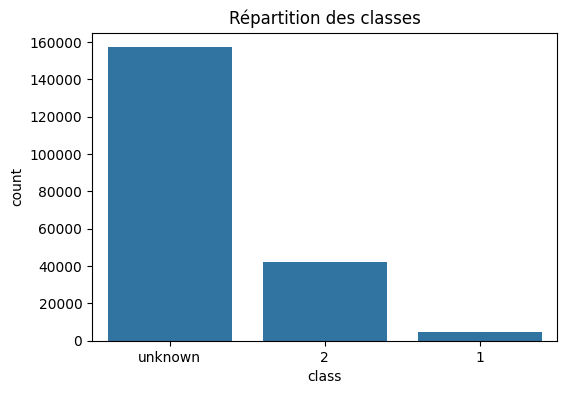

In [9]:
# visualisation de la distribution des classes 
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title("Répartition des classes")
plt.show()

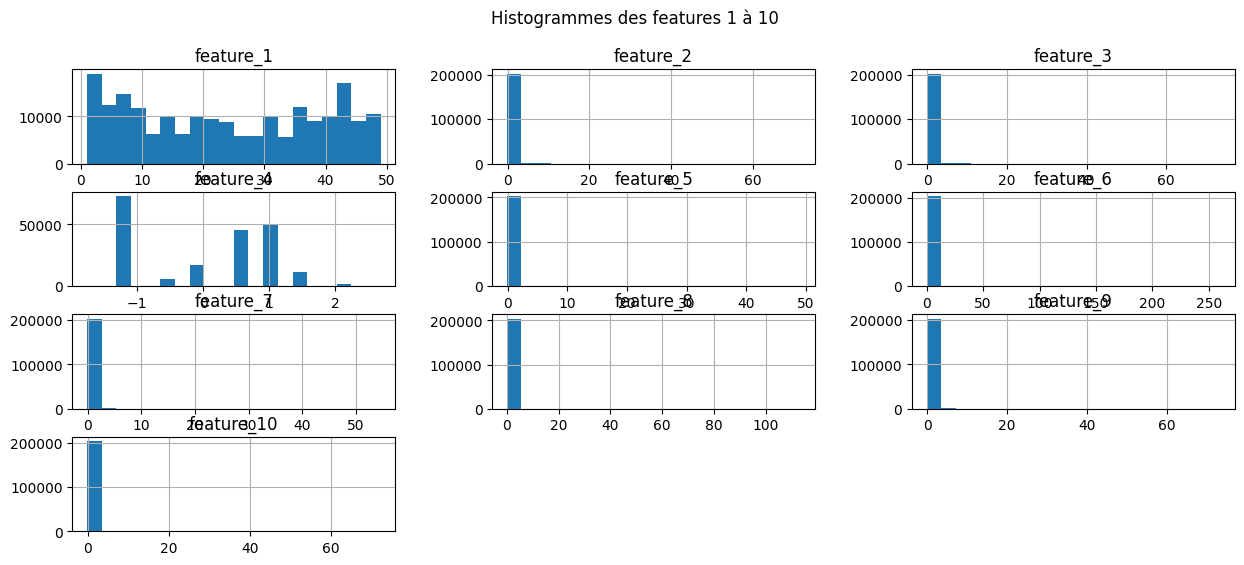

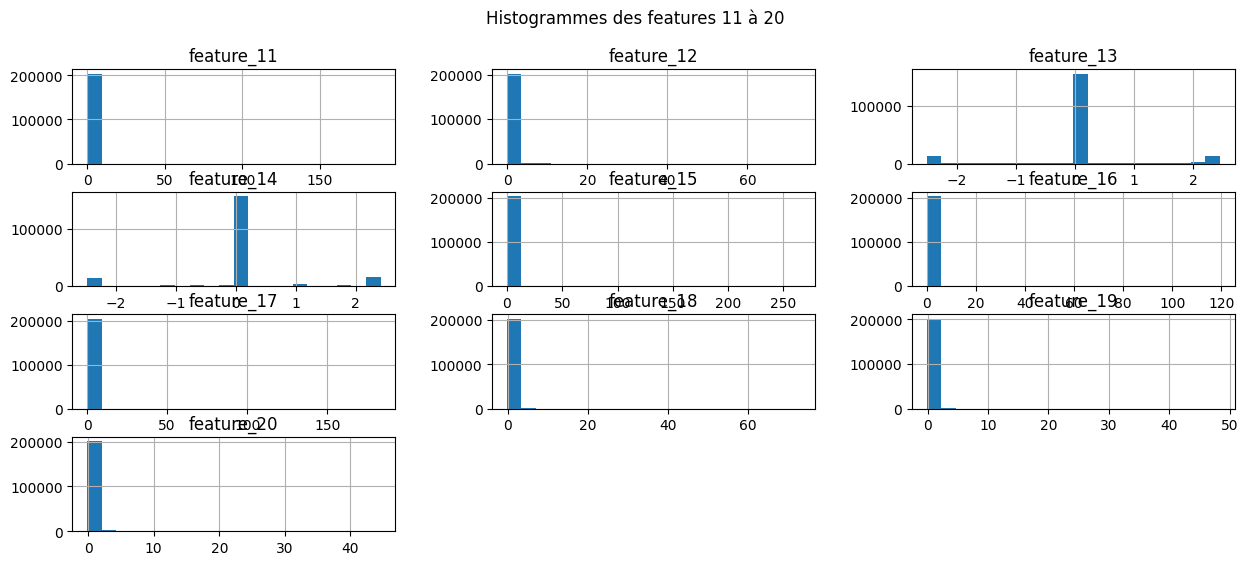

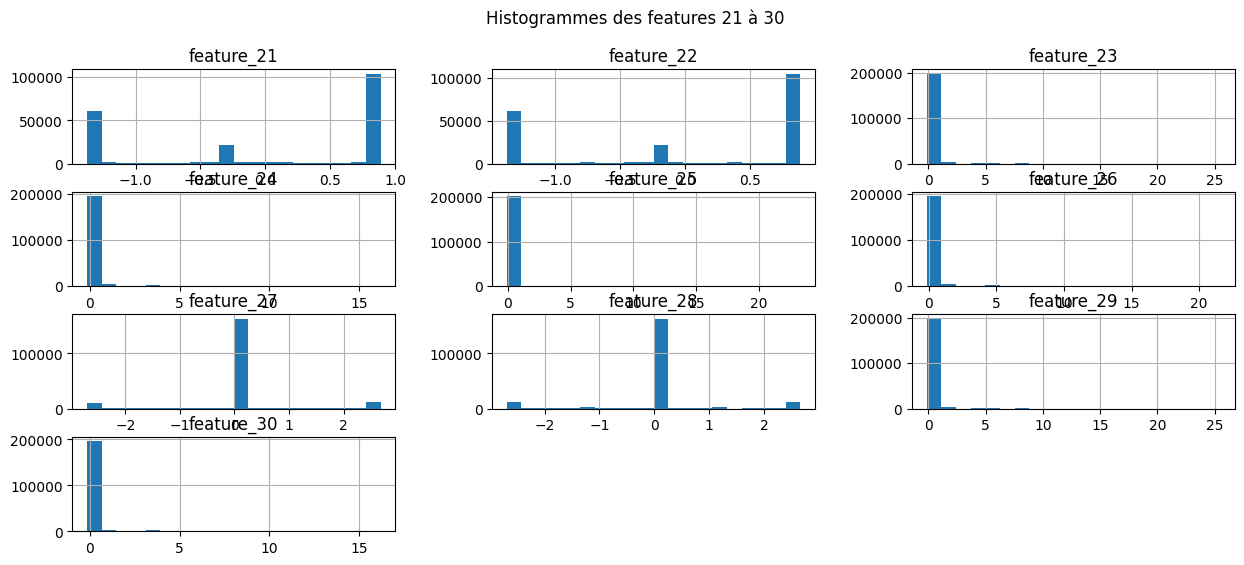

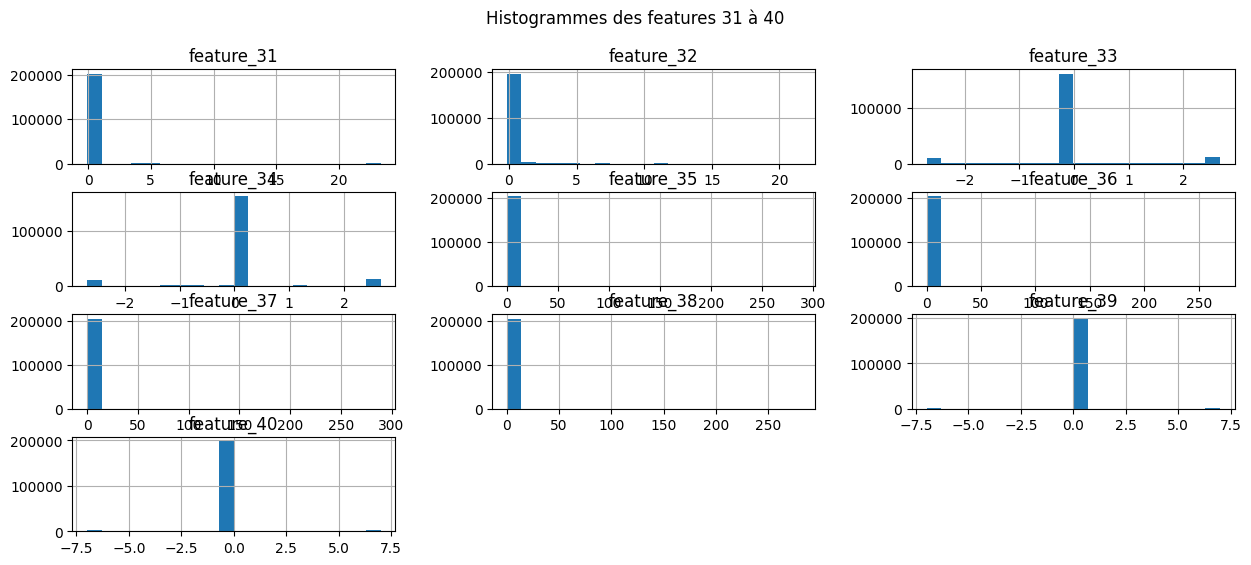

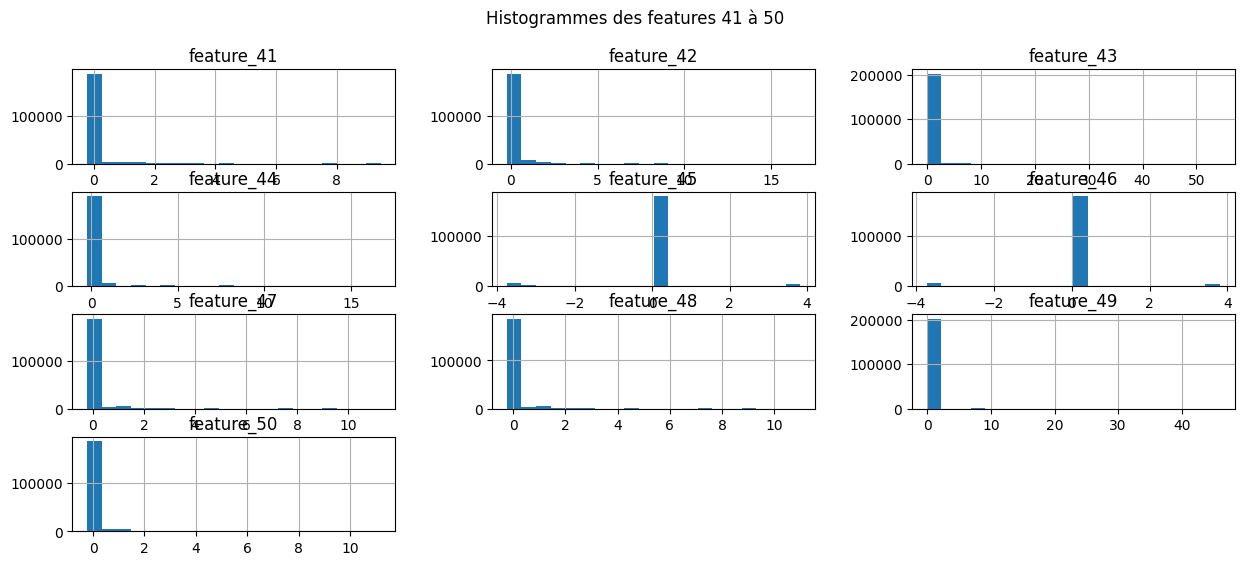

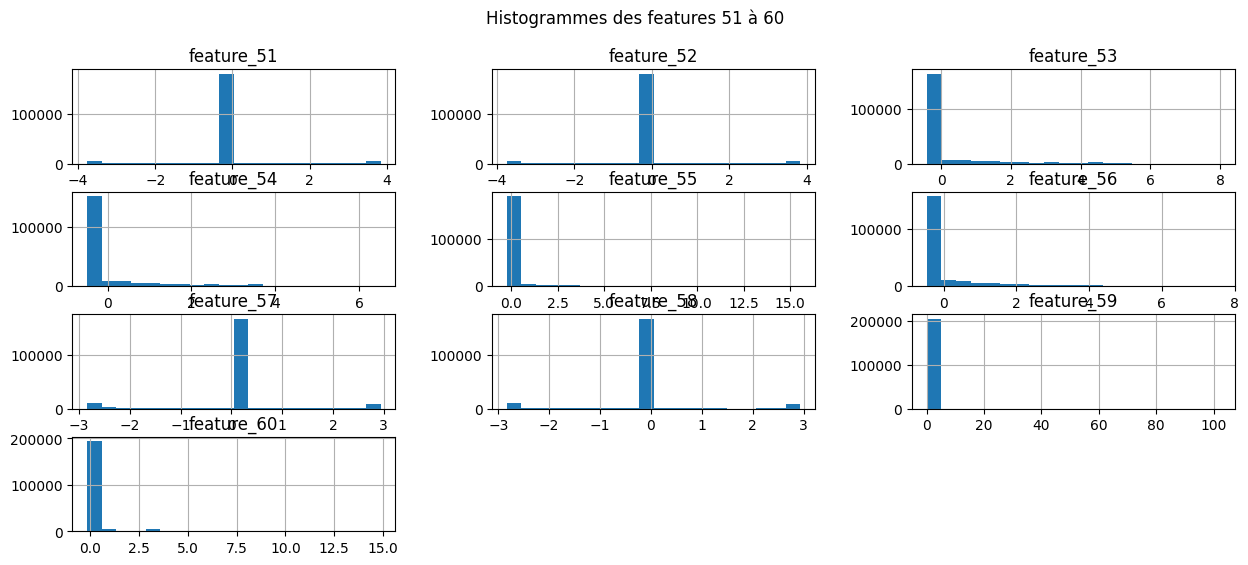

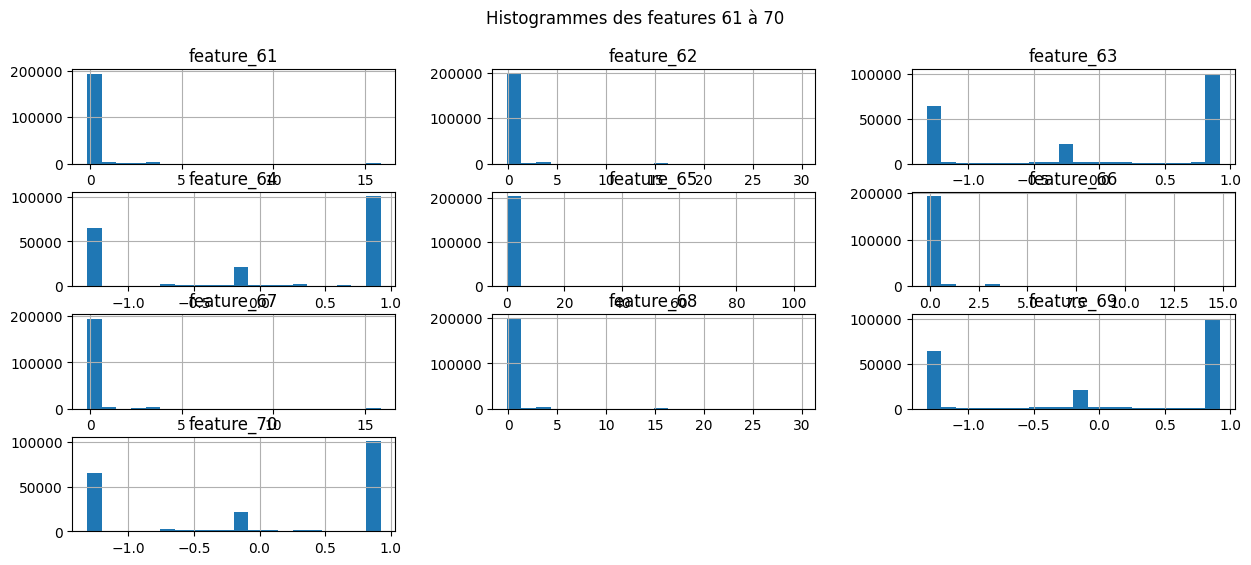

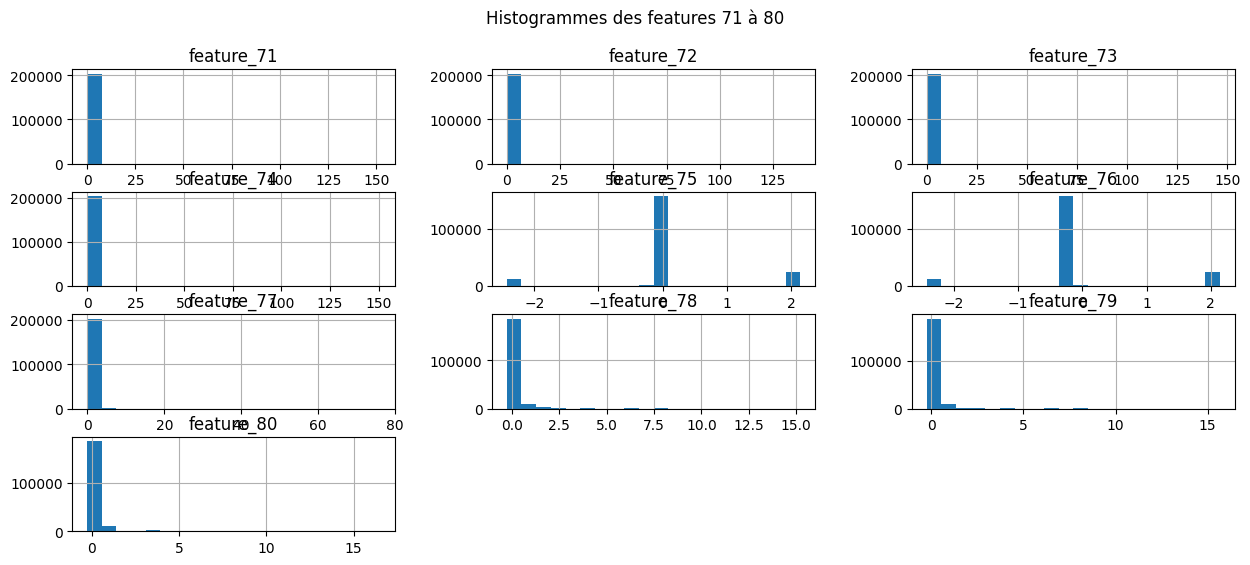

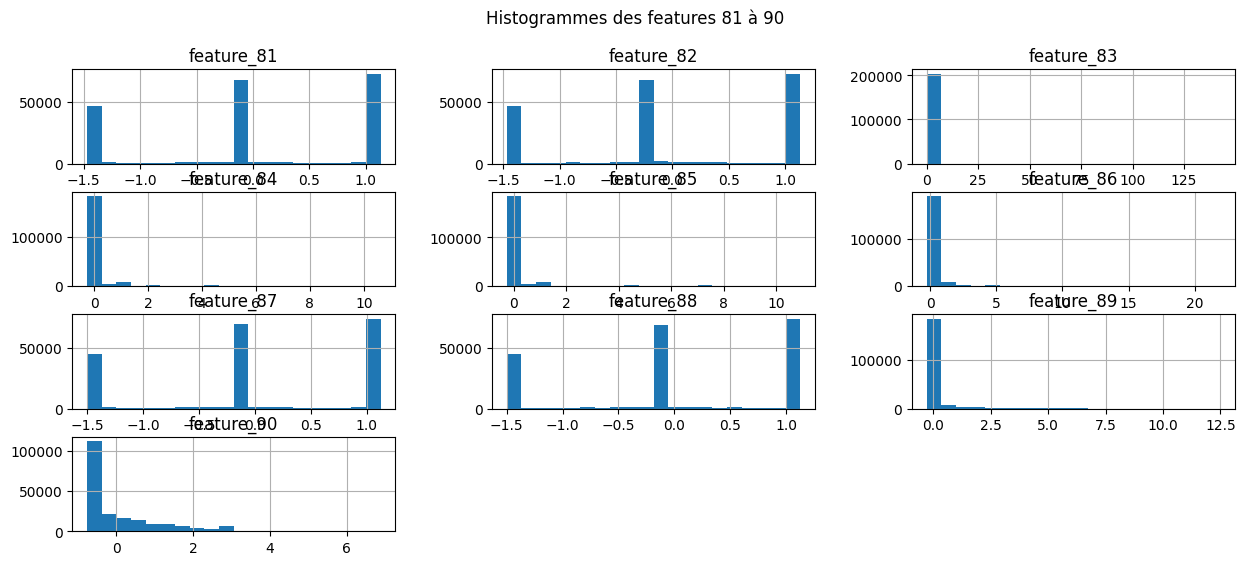

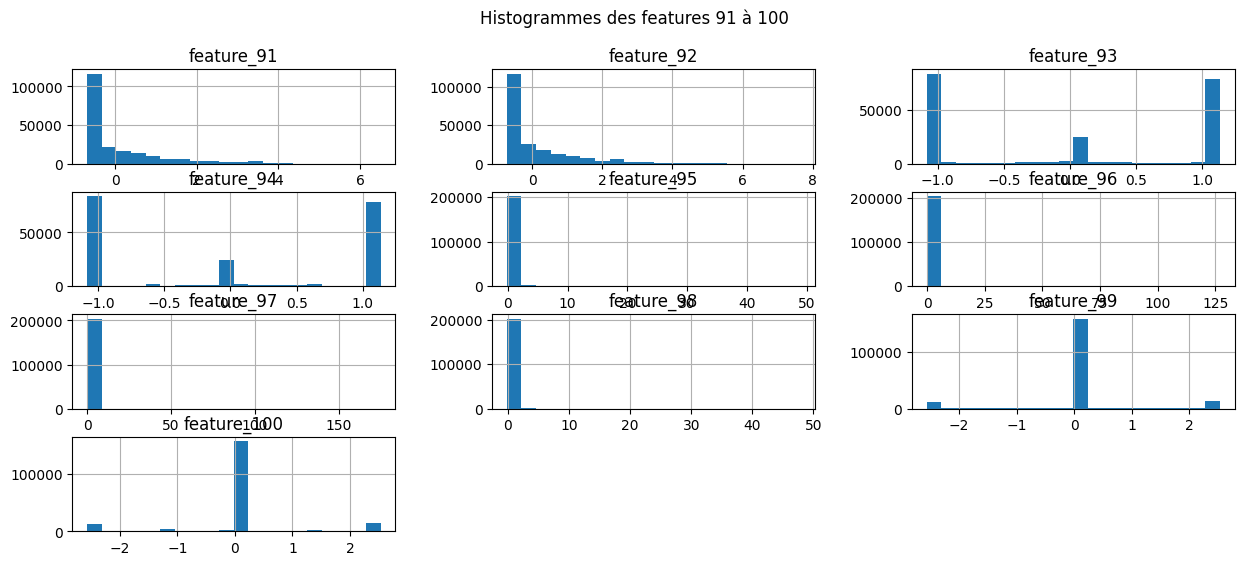

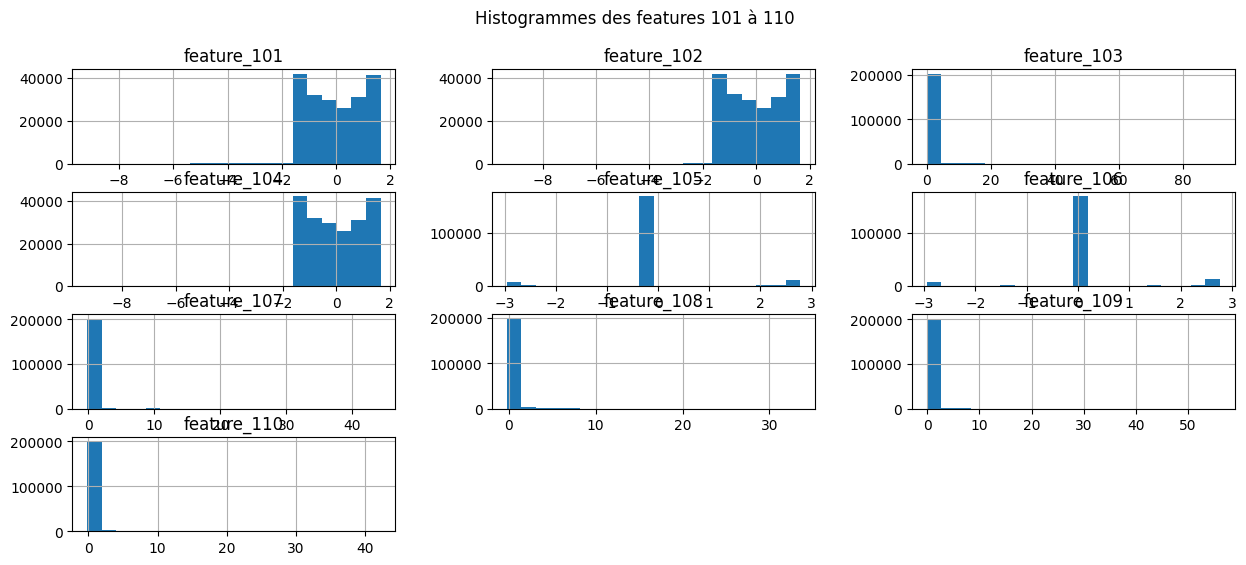

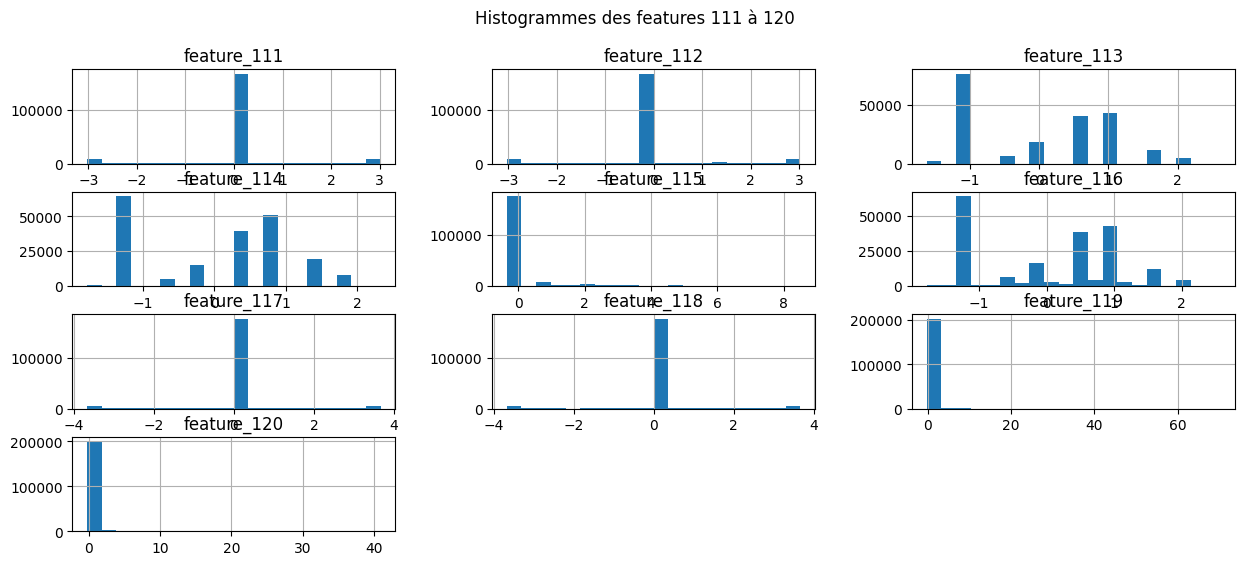

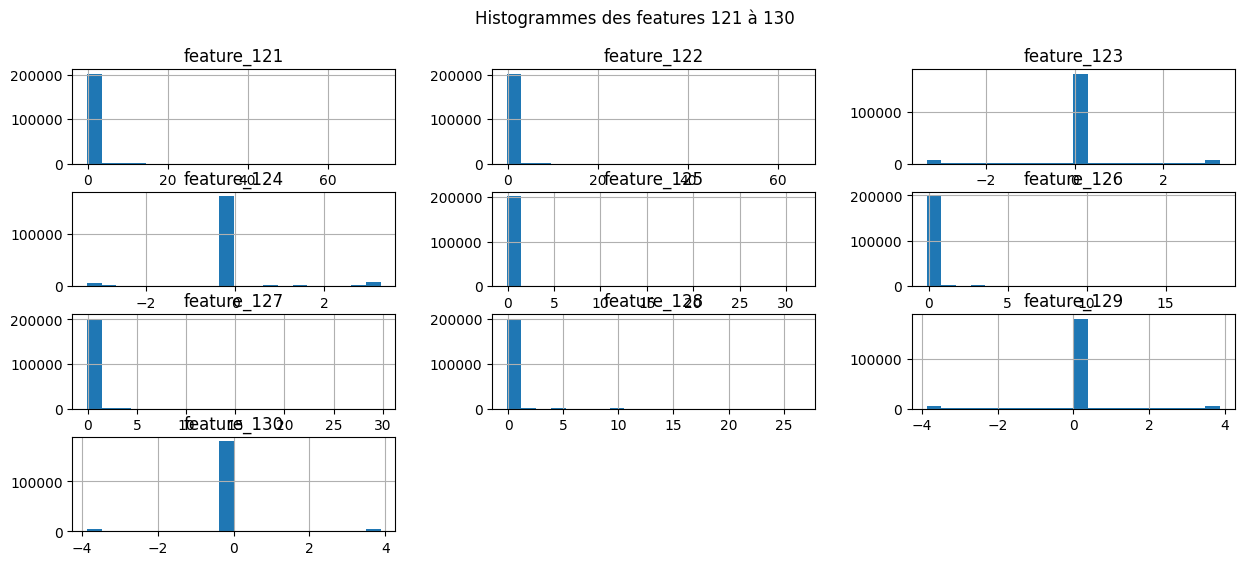

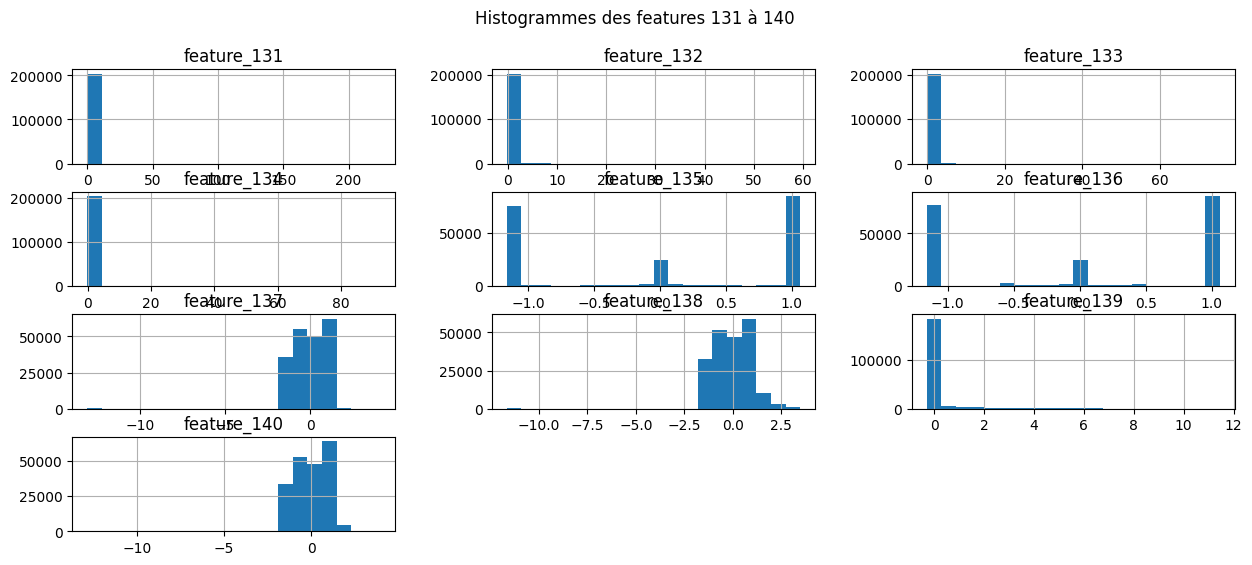

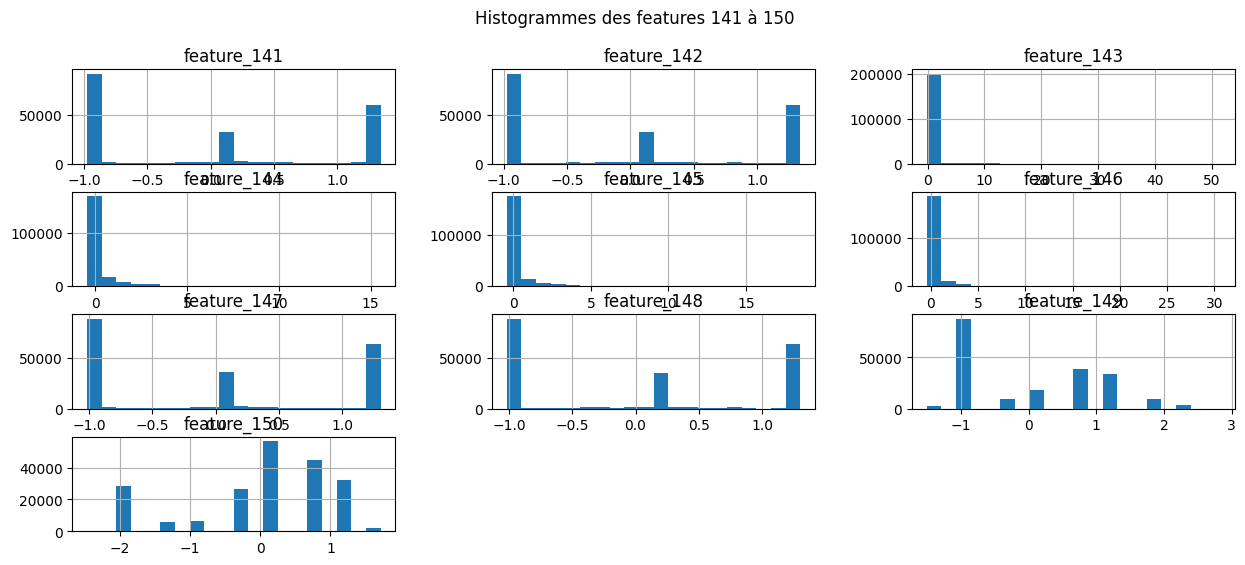

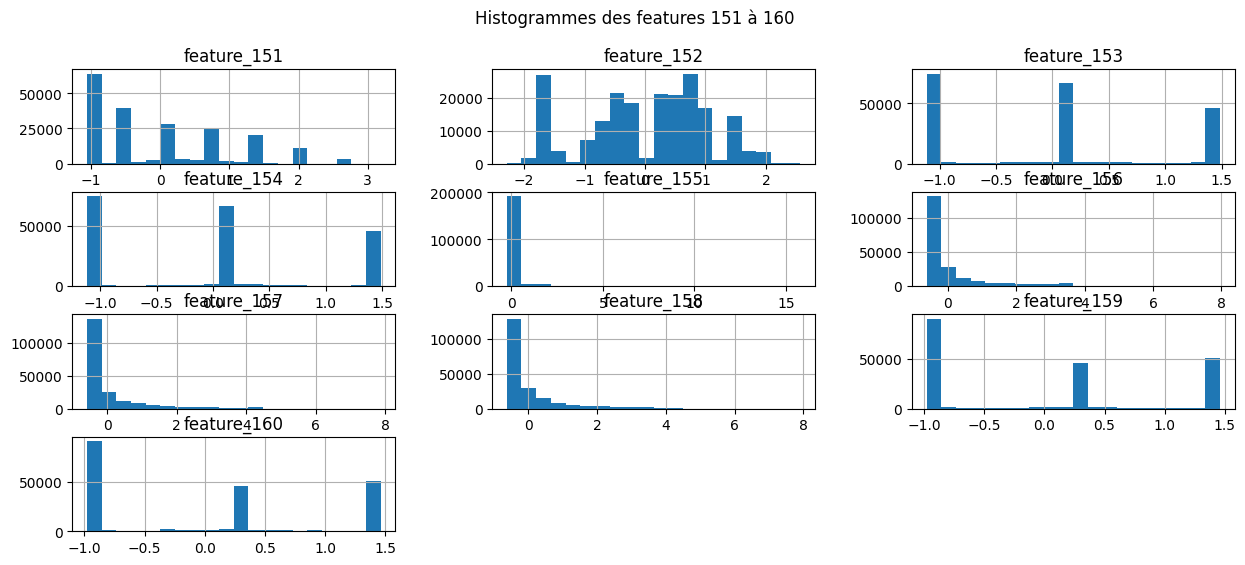

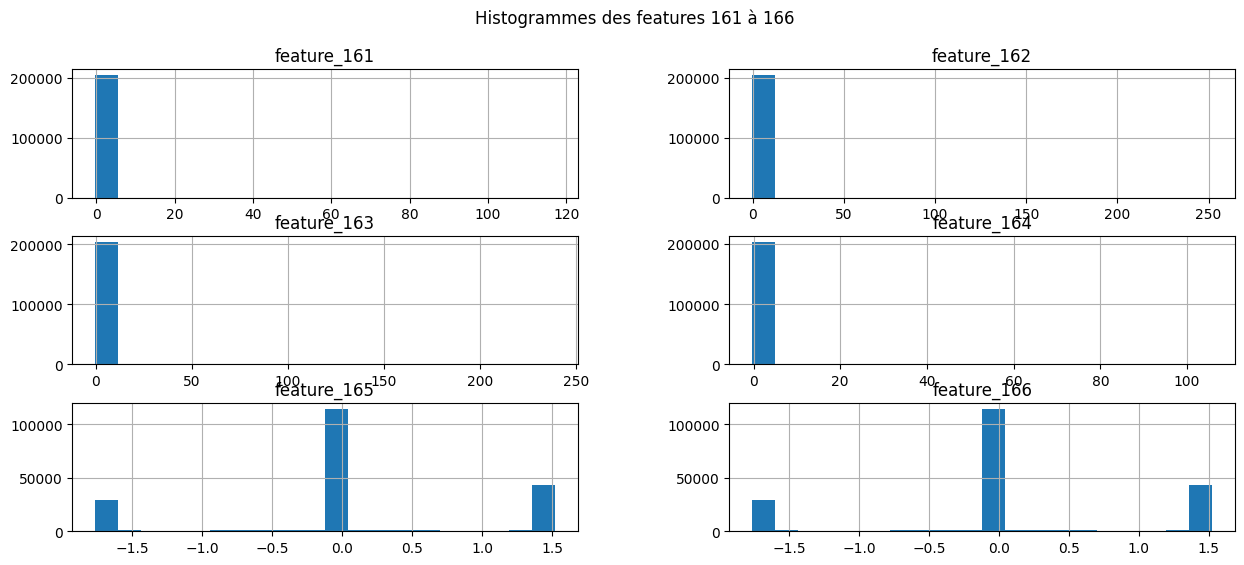

In [10]:
# Distribution des premières features 
numeric_cols = [col for col in df.columns if 'feature_' in col]
batch_size = 10

for i in range(0, len(numeric_cols), batch_size):
    batch = numeric_cols[i:i+batch_size]
    df[batch].hist(bins=20, figsize=(15,6))
    plt.suptitle(f"Histogrammes des features {i+1} à {i+len(batch)}")
    plt.show()


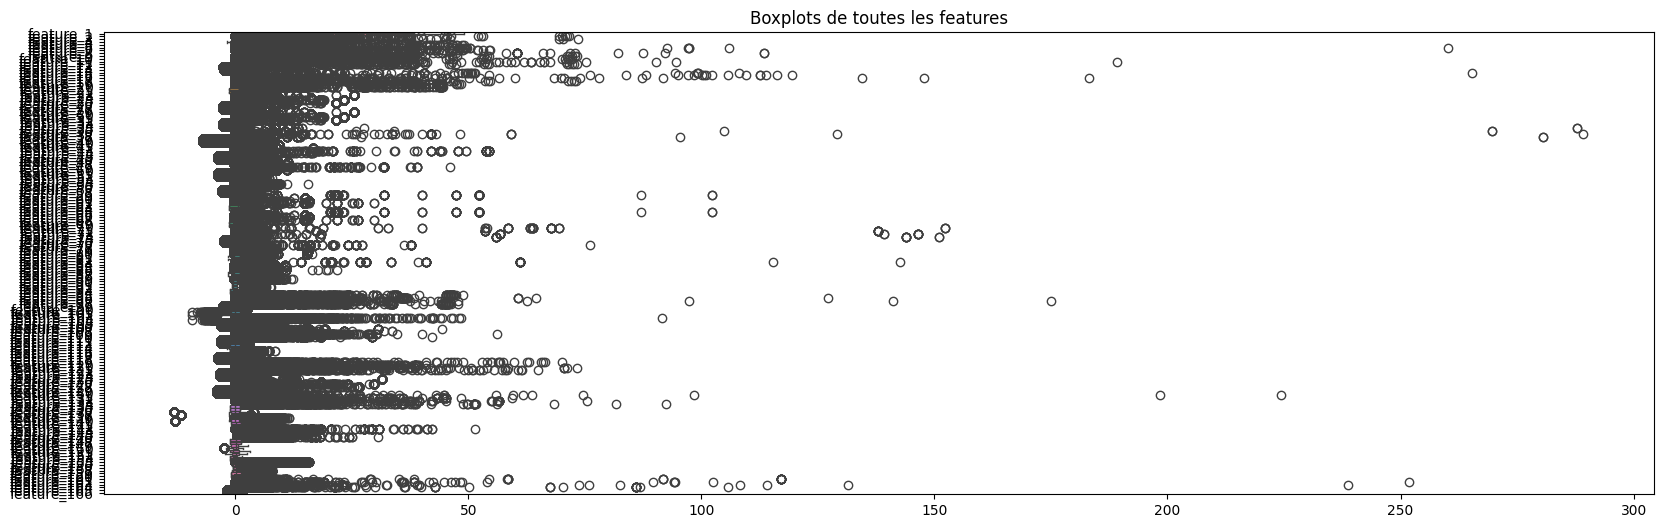

In [11]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df[numeric_cols], orient='h')  # horizontal pour mieux voir les noms
plt.title("Boxplots de toutes les features")
plt.show()


In [12]:
# Statistiques descriptives
desc = df[numeric_cols].describe().T
desc['range'] = desc['max'] - desc['min']
display(desc.head(10))


,count,mean,std,min,25%,50%,75%,max,range
feature_1,203769.0,2.384396e+01,15.172170,1.000000,9.000000,23.000000,38.000000,49.000000,48.000000
feature_2,203769.0,2.454849e-17,1.000002,-0.172983,-0.172532,-0.169204,-0.131855,71.681966,71.854948
feature_3,203769.0,-7.531922e-18,1.000002,-0.210553,-0.180327,-0.132897,-0.055242,73.595052,73.805604
feature_4,203769.0,2.231681e-17,1.000002,-1.756361,-1.201369,0.463609,1.018602,2.683580,4.439941
feature_5,203769.0,6.241732e-17,1.000002,-0.121970,-0.121970,-0.121970,-0.121970,49.027598,49.149568
feature_6,203769.0,7.653968e-17,1.000002,-0.063725,-0.043875,-0.043875,-0.043875,260.090707,260.154432
feature_7,203769.0,5.858162e-17,1.000002,-0.113002,-0.113002,-0.113002,-0.113002,54.565178,54.678180
feature_8,203769.0,3.068561e-17,1.000002,-0.061584,-0.061584,-0.061584,-0.061584,113.440873,113.502457
feature_9,203769.0,3.570689e-17,1.000002,-0.163646,-0.163517,-0.162044,-0.135593,73.354565,73.518211
feature_10,203769.0,4.630738e-17,1.000002,-0.169460,-0.169070,-0.166226,-0.132366,72.318396,72.487856


## Corrélations et relations features-target

In [13]:
sample_cols = numeric_cols[:10]
corr = df[sample_cols].corr()

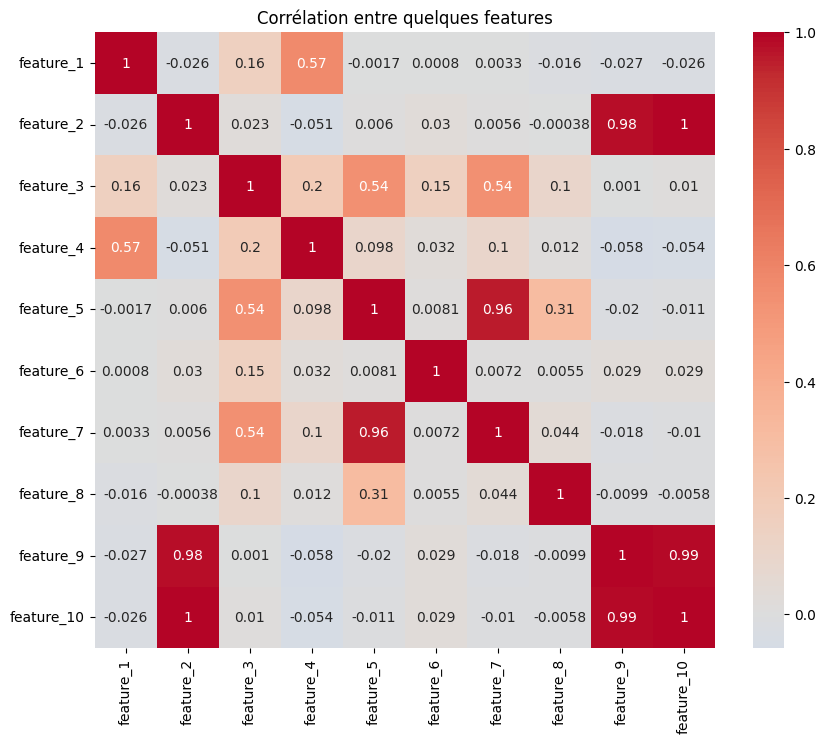

In [14]:
# visualisation des correlations 
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Corrélation entre quelques features")
plt.show()

In [16]:
# Vérifier les types de toutes les colonnes
df.dtypes.value_counts()

float64    165
int64        2
object       1
Name: count, dtype: int64

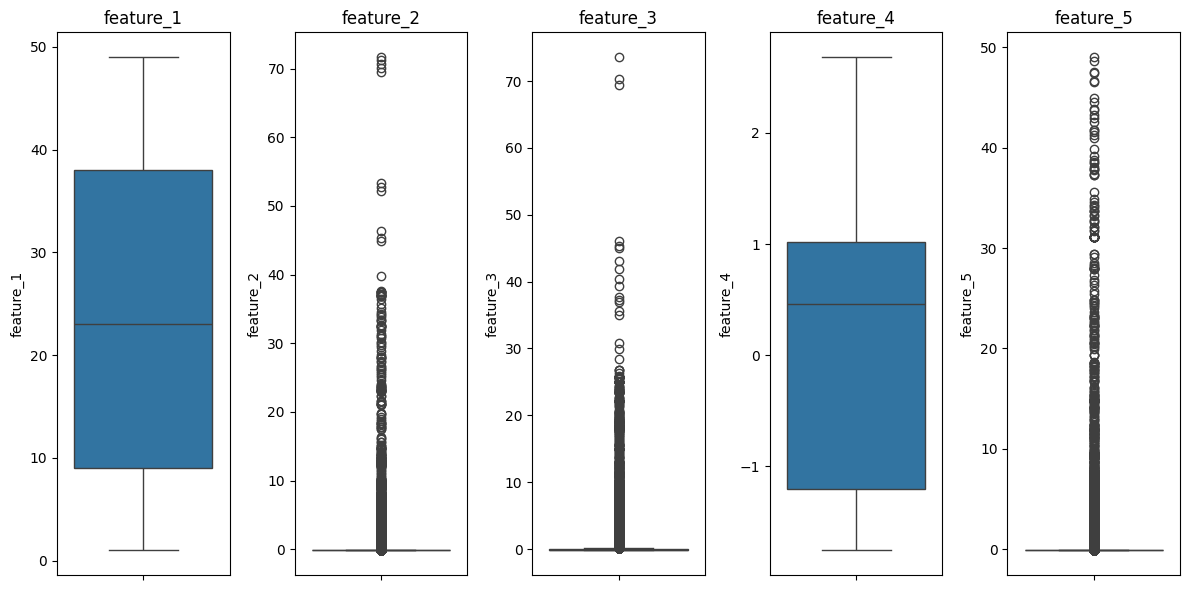


Nombre d'outliers (z-score > 3) par feature (premières 5) :


IndexError: invalid index to scalar variable.

In [15]:
# Boxplots pour visualiser les outliers (exemple sur 5 premières features)
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols[:5], 1):
    plt.subplot(1,5,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Z-score pour détecter outliers numériques
from scipy import stats
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers_count = (z_scores > 3).sum()
print("\nNombre d'outliers (z-score > 3) par feature (premières 5) :")
print(outliers_count[:5])


In [17]:
# sauvegarder la metrice de cofusion (pour toutes les features)
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[[col for col in df.columns if 'feature_' in col]].corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation de toutes les features")

# Enregistrer l'image sans l'afficher
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.close()

print(" Heatmap enregistrée sous 'correlation_matrix.png'")


 Heatmap enregistrée sous 'correlation_matrix.png'


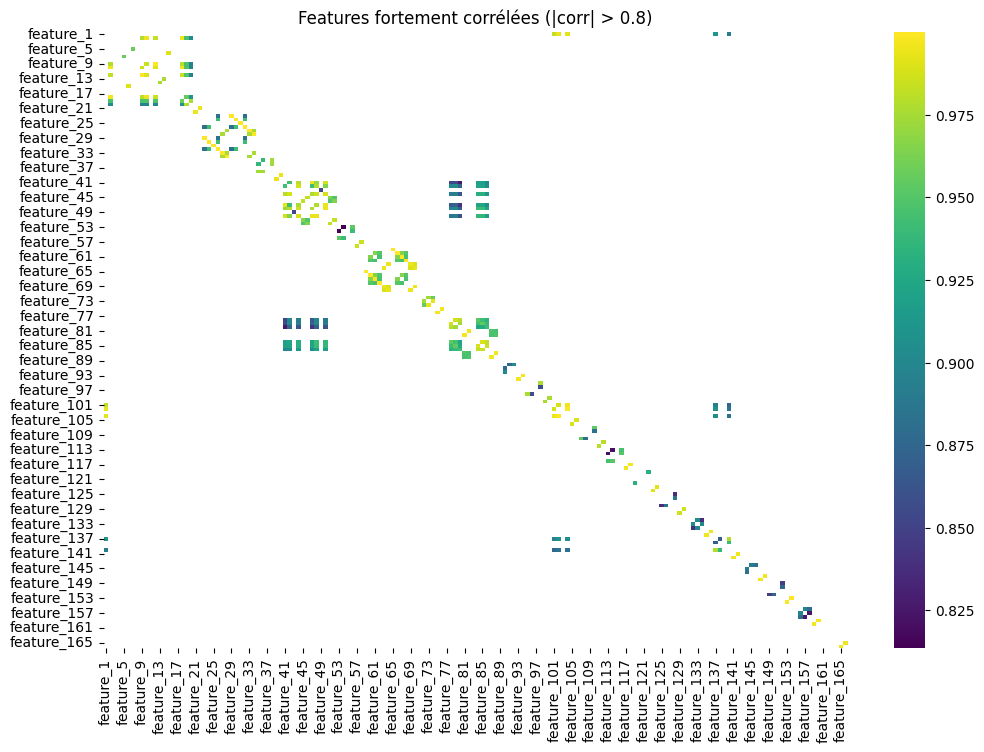

In [19]:
#Visualiser uniquement les corrélations fortes
import numpy as np

high_corr = corr[(corr.abs() > 0.8) & (corr.abs() < 1)]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr, cmap='viridis')
plt.title("Features fortement corrélées (|corr| > 0.8)")
plt.show()